# **실습 5차시: Model Evaluation (모델 성능 평가)**

실습 내용:

*   Accuracy
*   Precision and Recall
*   F1 Score
*   ROC-AUC
*   Cross-validation

**기한: 2022년 11월 15일 화요일 오후 1시 59분**

# **1. Accuracy(정확도)**

Confusion matrix:

<img src=https://miro.medium.com/max/712/1*Z54JgbS4DUwWSknhDCvNTQ.png width=300px>


- True Positive(TP): 참양성
- False Positive(FP): 위양성
- True Negative(TN): 참음성
- False Negative(FN): 위음성

분류 모델을 만든 후 다음 단계는 모델의 예측 능력을 평가해야합니다. 

모델의 성능을 평가하는 가장 간단한 방법은 모델의 정확도를 계산하는 것입니다.


$$\frac{\text{True Positives + True Negatives}}{\text{True Positives + True Negatives + False Positives + False Negatives}}$$

In [1]:
labels_A = [0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
guesses_A =[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

labels_B = [0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
guesses_B =[1, 1, 1, 1, 1, 1, 1, 0, 1, 1]

In [2]:
# 위의 예제로 TP, FP, TN, FN을 직접 계산해보는 함수입니다
def cal_metrics(labels, guesses):
  true_positives = 0
  true_negatives = 0
  false_positives = 0
  false_negatives = 0
  for i in range(len(guesses)):
    #True Positives
    if labels[i] == 1 and guesses[i] == 1:
      true_positives += 1
    #True Negatives
    if labels[i] == 0 and guesses[i] == 0:
      true_negatives += 1
    #False Positives
    if labels[i] == 0 and guesses[i] == 1:
      false_positives += 1
    #False Negatives
    if labels[i] == 1 and guesses[i] == 0:
      false_negatives += 1
  return true_positives, true_negatives, false_positives, false_negatives

In [3]:
# A에 대하여 accuracy를 계산해봅니다.
TP_A, TN_A, FP_A, FN_A = cal_metrics(labels_A, guesses_A)

accuracy_A = (TP_A + TN_A) / len(guesses_A)
print(accuracy_A)

0.8


In [4]:
# B에 대하여 accuracy를 계산해봅니다.
TP_B, TN_B, FP_B, FN_B = cal_metrics(labels_B, guesses_B)

accuracy_B = (TP_B + TN_B) / len(guesses_B)
print(accuracy_B)

0.2


# **2. Precision(정밀도)**

**양성으로 식별된 사례 중 실제로 양성이었던 사례의 비율**

- Precision은 양성으로 예측된 것 (TP + FP) 중 얼마나 많은 샘플이 진짜 양성 (TP) 인지 측정합니다.

- 직관적으로 Precision은 negative sample을 positive sample로 예측하지 않는 분류기의 성능을 나타냅니다. 

- Precision은 거짓 양성(FP)의 수를 줄이는 것이 목표일 때 성능 지표로 사용합니다.

- 위양성이 생성되지 않는 모델의 정밀도는 1.0입니다.

- 예시) 모델의 정밀도는 0.5일때, 어떠한 종양이 악성일 가능성이 있다고 예측하면 예측 정확도가 50% 입니다.



$$\frac{\text{True Positives}}{\text{True Positives + False Positives}}$$

In [5]:
# precision_A을 계산해봅니다.
TP_A / (TP_A + FP_A)

1.0

In [6]:
# precision_B을 계산해봅니다.
TP_B / (TP_B + FP_B)

0.2222222222222222

# **3. Recall(재현율)**

**실제 양성 중 정확히 양성이라고 식별된 사례의 비율**

- Recall은 전체 양성 샘플 (TP + FN) 중에서 얼마나 많은 샘플이 양성 클래스(TP)로 분류되는지를 측정합니다. 

- 직관적으로, Recall은 분류기가 positive sample들을 올바르게 찾는 성능을 평가합니다. 

- Recall은 모든 양성 샘플을 식별해야 할 때 성능 지표로 사용됩니다. 즉, 거짓 음성(FN)을 피하는 것이 중요할 때 입니다.

- 위음성을 생성하지 않는 모델의 재현율은 1.0입니다.

- 예시) 모델의 재현율은 0.11일때, 모든 악성 종양의 11% 를 올바르게 식별합니다..

$$\frac{\text{True Positives}}{\text{True Positives + False Negatives}}$$

Precision과 Recall은 서로 상충하는 metric입니다. 하나가 내려가면 다른 하나가 올라갑니다.

In [7]:
# Recall_A을 계산해봅니다.
recall_A = TP_A / (TP_A + FN_A)
print(recall_A)

0.3333333333333333


In [8]:
# Recall_B을 계산해봅니다.
recall_B = TP_B / (TP_B + FN_B)
print(recall_B)

0.6666666666666666


####**Side Note:**

<img src=https://miro.medium.com/max/712/1*Z54JgbS4DUwWSknhDCvNTQ.png width=300px>

- Precision(정밀도): 양성으로 식별된 사례 중 실제로 양성이었던 사례의 비율

$$\text{Precision} = \frac{TP}{TP + FP}$$

- Recall(재현율): 실제 양성 중 정확히 양성이라고 식별된 사례의 비율

$$\text{Recall} = \frac{TP}{TP + FN}$$

- Sensitivity(민감도) = recall: 실제로 양성인 사람이 검사에서 양성으로 판정될 확률

$$\text{Sensitivity} = \frac{TP}{TP + FN}$$

- Specificity(특이도): 실제로 음성인 사람이 검사에서 음성으로 판정될 확률

$$\text{Specificity} = \frac{TN}{FP + TN}$$

# **4. F1 Score**

모델의 성능을 완전히 평가하려면 정밀도와 재현율을 모두 검사해야 합니다. F1 score을 통해 Precision과 Recall 모두를 고려하는 하나의 metric을 제시할 수 있습니다. F1 score은 Precision과 Recall의 조화평균(harmonic mean)입니다. 조화평균은 n개의 양수에 대하여 그 역수들을 산술평균한 것의 역수를 말합니다.

$$2*\frac{\text{Precision} * \text{Recall}}{\text{Precision} + \text{Recall}}$$

F1 score는 Precision과 Recall을 하나의 metric으로 결합합니다. 산술 평균보다 조화 평균을 사용하여 F1 score을 계산하는 이유는 Precision이나 Recall이 0일 때 F1 score이 낮아지기를 원하기 때문입니다.

- 예를 들어, Recall = 1이고 Precision = 0.01인 모델이 있다고 가정합니다. Precision이 너무 낮기 때문에 이 모델에 문제가 있을 가능성이 높습니다. 따라서 F1 score은 Precision과 Recall을 같이 고려하므로 불균형한 이진 분류 데이터셋에서는 정확도보다 더 나은 지표가 될 수 있습니다.

산술평균(arithmetic mean)을 사용한 F1 score은 다음과 같습니다.

$$\frac{1 + 0.01}{2} = 0.505$$

너무 높습니다. 따라서 조화 평균을 사용한 F1 score은 다음과 같습니다.

$$2*\frac{1 * 0.01}{1 + 0.01} = 0.019$$

산술 평균을 사용한 F1 score은 분류기의 성능을 더욱 정확하게 파악하는데 도움이 됩니다.

In [9]:
# F1 score을 계산해봅니다.
precision_A = TP_A / (TP_A + FP_A)

f1_A = 2 * (precision_A * recall_A) / (precision_A + recall_A)
print(f1_A)

0.5


In [10]:
# F1 score을 계산해봅니다.
precision_B = TP_B / (TP_B + FP_B)

f1_B = 2 * (precision_B * recall_B) / (precision_B + recall_B)
print(f1_B)

0.3333333333333333


# **5. Scikit-Learn**

Scikit_learn 라이브러리에는 위의 metric들을 간단하게 계산해주는 함수들이 있습니다.

In [11]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

labels = [1, 0, 0, 1, 1, 1, 0, 1, 1, 1]
guesses = [0, 1, 1, 1, 1, 0, 1, 0, 1, 0]

In [12]:
# 정확도, recall, precision, F1 score을 계산해봅니다.
print(accuracy_score(labels, guesses))
print(recall_score(labels, guesses))
print(precision_score(labels, guesses))
print(f1_score(labels, guesses))

0.3
0.42857142857142855
0.5
0.4615384615384615


# **6. Binary Classification and Model Evaluation**





## 6-1. Dataset
  
이번 실습은 [California Housing Dataset](https://www.kaggle.com/camnugent/california-housing-prices)를 사용합니다. 이 데이터는 미국의 1990년 인구 조사 데이터를 기반으로 캘리포니아 특정 지역의 주택에 관한 것입니다.

1. longitude: 집이 서쪽으로 얼마나 멀리 떨어져 있는지 나타내는 척도이며, 값이 더 높은 것은 서쪽으로 더 멀리 떨어져 있습니다.
2. latitude: 집이 북쪽으로 얼마나 멀리 떨어져 있는지 나타내는 척도이며, 더 높은 값이 더 북쪽입니다.
3. housing_median_age: 블록 내 주택의 연식입니다. 숫자가 낮으면 새 건물입니다.
4. total_rooms: 블록 내의 방 개수입니다.
5. total_bedrooms: 한 블록 내의 총 침실 개수입니다.
6. population: 한 블록 내의 총 인구 수입니다.
7. households: 한 블록에 대한 총 가구 수입니다.
8. median_income: 주택 블록 내 가구의 중위소득입니다.
9. medium_house_value: 블록 내 가구의 평균 주택 값(미국 달러로 측정)입니다.

In [13]:
import pandas as pd 

train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

In [14]:
train_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## 6-2. Z-score Normalization

여러 feature이 존재하는 데이터로 모델을 훈련시키는 경우 각 피쳐의 값은 거의 동일한 범위를 가져야합니다. 예를 들어 한 feature의 범위가 500 ~ 100,000이고 다른 feature의 범위가 2 ~ 12인 경우 모델을 훈련하기가 어렵거나 불가능합니다.

이번 실습에서 다룰 정규화 방법은 각 raw value(레이블 포함)을 Z-score으로 변환하여 정규화하는 방식입니다. **Z-score**는 특정 raw value에 대한 평균으로부터의 표준 편차의 개수입니다. 예를 들어, 다음과 같은 특성을 가진 feature이 있다고 가정합니다.

  * 평균은 60 입니다.
  * 표준편차는 10 입니다.

75인 raw value는 Z-score이 +1.5이 될 것입니다:

```
  Z-score = (75 - 60) / 10 = +1.5
```

38인 raw value는 Z-score이 -2.2가 될 것입니다:

```
  Z-score = (38 - 60) / 10 = -2.2
```

Z-score 정규화 공식은 다음과 같습니다.

$$\frac{value - \mu}{\sigma}$$

여기서 $\mu$는 평균값이고 $\sigma$는 표준 편차입니다. raw value가 feature의 모든 값의 평균과 정확히 같으면 0으로 정규화됩니다. 평균 아래에 있으면 음수가 되고 평균 위에 있으면 양수가 됩니다. Z-score의 크기는 표준 편차에 의해 결정됩니다. 정규화되지 않은 데이터에 큰 표준 편차가 있으면 정규화 값이 0에 가깝습니다.


In [15]:
train_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

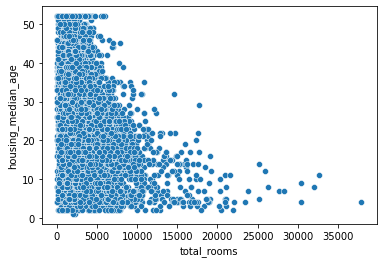

In [16]:
import seaborn as ans

ans.scatterplot(x=train_df.total_rooms, y=train_df.housing_median_age)

In [17]:
# training set에 대하여 Z-Score 정규화를 합니다.
train_df_mean = train_df.mean()
train_df_std = train_df.std()
train_df_norm = (train_df - train_df_mean) / train_df_std

In [18]:
# 정규화된 데이터를 확인합니다.
train_df_norm.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,2.619288,-0.671500,-1.079639,1.361655,1.764152,-0.361173,-0.075996,-1.252506,-1.210522
1,2.539494,-0.573248,-0.761850,2.296540,3.230346,-0.261858,-0.099401,-1.081451,-1.096713
2,2.494610,-0.905436,-0.920744,-0.882436,-0.866931,-0.955326,-0.999223,-1.170071,-1.048430
3,2.489623,-0.928830,-1.159087,-0.524171,-0.480216,-0.796769,-0.715753,-0.362590,-1.154480
4,2.489623,-0.961581,-0.682402,-0.545731,-0.506313,-0.701809,-0.622130,-1.026424,-1.222593


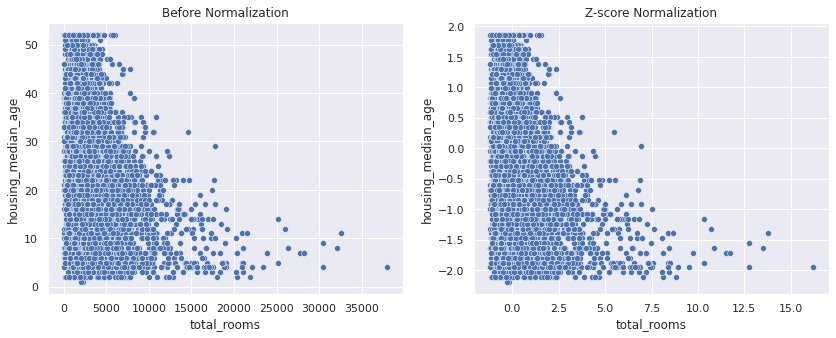

In [19]:
# Z-score 전후 데이터의 범위를 비교해봅니다.
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(14,5)})

fig, ax = plt.subplots(1,2)
sns.scatterplot(x=train_df.total_rooms, y=train_df.housing_median_age, ax=ax[0]).set(title='Before Normalization')
sns.scatterplot(x=train_df_norm.total_rooms, y=train_df_norm.housing_median_age, ax=ax[1]).set(title='Z-score Normalization')
fig.show()

In [20]:
# 그래프 사이즈 재설정
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [21]:
# test set에 대해서도 동일하게 Z-Score 정규화를 합니다.
test_df_mean = test_df.mean()
test_df_std = test_df.std()
test_df_norm = (test_df - test_df_mean) / test_df_std

## 6-3. Create a binary label

분류 문제에서 모든 예제의 레이블은 0 또는 1이어야 합니다. 하지만 California Housing Dataset의 label인 `median_house_value`는 0과 1이 아닌 80,100 또는 85,700과 같은 float 값을 포함하고 있는 반면, 정규화된 데이터의 `median_house_values`는 주로 -3과 +3 사이의 float 값을 포함하고 있습니다.

Training set과 test set에 `median_house_value_is_high`의 새 column을 만듭니다. `median_house_value`가 특정 임계값(`threshold`)보다 높은 경우 `median_house_value_is_high`를 1로 설정합니다. 그렇지 않으면 `median_house_value_is_high`를 0으로 설정합니다.

In [22]:
# median_house_value를 임계값에 따라 0과 1로 인코딩합니다.
threshold_in_z = 1.0
train_df_norm["median_house_value_is_high"] =(train_df_norm["median_house_value"] > threshold_in_z).astype(float)
test_df_norm["median_house_value_is_high"] =(test_df_norm["median_house_value"] > threshold_in_z).astype(float)

In [23]:
# 변환이 잘 되었는지 확인해봅니다.
train_df_norm["median_house_value_is_high"].unique()

array([0., 1.])

In [24]:
# California housing dataset은 label이 불균형한 데이터입니다. 불균형한 정도를 확인해봅니다.
train_df_norm["median_house_value_is_high"].value_counts()

0.0    14223
1.0     2777
Name: median_house_value_is_high, dtype: int64

In [25]:
train_df_norm["median_house_value_is_high"].value_counts() / train_df_norm.shape[0]

0.0    0.836647
1.0    0.163353
Name: median_house_value_is_high, dtype: float64

In [26]:
# train/test의 X와 y를 분리합니다.
X_train = train_df_norm.drop(columns=["median_house_value_is_high", "median_house_value"])
X_test = test_df_norm.drop(columns=["median_house_value_is_high", "median_house_value"])
y_train = train_df_norm["median_house_value_is_high"]
y_test = test_df_norm["median_house_value_is_high"]

## 6-4. Train a classifier

In [27]:
# MLPClassifier을 생성하고 훈련시킵니다.
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=42, max_iter=1000, learning_rate_init=0.01)
clf.fit(X_train, y_train)

MLPClassifier(learning_rate_init=0.01, max_iter=1000, random_state=42)

In [28]:
# 모델 평가를 위해서 예측값과 예측된 확률값을 만듭니다.
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

## 6-5. Evaluate the model

### Confusion Matrix

- scikit-learn [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [29]:
# confusion matrix를 출력해봅니다.
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[2416,  110],
       [ 149,  325]])

- scikit-learn [ConfusionMatrixDisplay.from_predictions](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions)

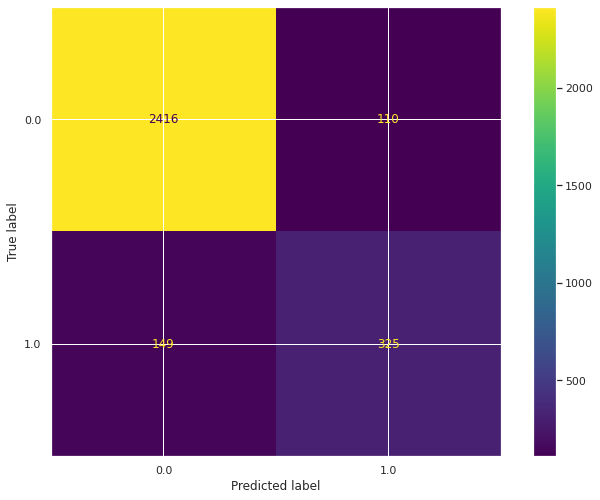

In [30]:
# confusion matrix를 시각화해봅니다.
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

- scikit-learn [ConfusionMatrixDisplay.from_estimator](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_estimator)

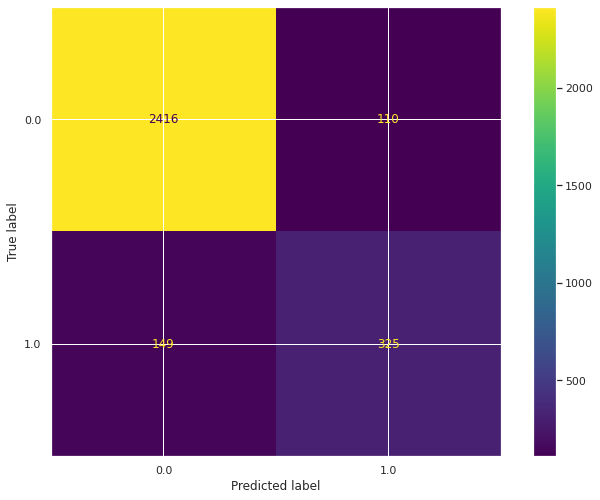

In [31]:
# confusion matrix를 시각화해봅니다.
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

### Precision-Recall

모델의 분류 작업을 결정하는 임계값을 바꾸는 것은 해당 분류기의 precision과 recall의 상충 관계를 조정하는 일 입니다. 
- 예를 들어 양성 샘플의 실수(FN)을 10%보다 작게 하여 90% 이상의 recall을 원할 수 있습니다. 이런 결정은 데이터와 애플리케이션에 따라 다르며 목표에 따라 달리 결정됩니다. 
- 어떤 목표가 선택되면 (즉, 어떤 클래스에 대한 특정 recall 또는 precision의 값) 적절한 임계값을 지정할 수 있습니다. 다시 말해 90% recall과 같은 특정 목적을 충족하는 임계값을 설정하는 것은 언제든 가능합니다. 

어려운 부분은 이 임계값을 유지하면서 적절한 precision을 내는 모델을 만드는 일 입니다. 
- 만약 모든 것을 양성이라고 분류하면 recall이 100이 되지만 이러한 모델은 쓸모가 없을 것 입니다.

<img src=https://developers.google.com/static/machine-learning/crash-course/images/PrecisionVsRecallRaiseThreshold.svg width=600px>

새로운 모델을 만들 때에는 임계값이 명확하지 않은 경우가 많습니다. 이런 경우에는 문제를 더 잘 이해하기 위해 모든 임계값을 조사해보거나, 한번에 precision과 recall의 모든 장단점을 살펴보는 것이 좋습니다. 이를 위해 precision-recall curve를 사용합니다.

- scikit-learn [PrecisionRecallDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.PrecisionRecallDisplay.html)

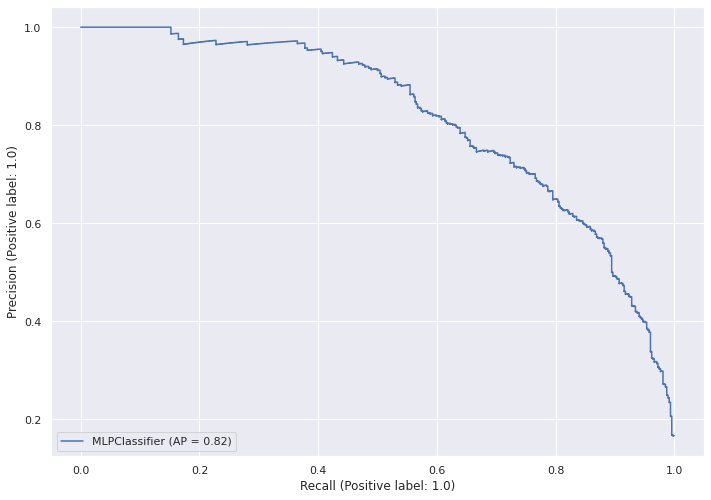

In [32]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_estimator(clf, X_test, y_test)

- 곡선의 각 포인트는 가능한 임계값에 대하여 precision과 recall입니다. 
- 곡선이 오른쪽 위로 갈 수록 더 좋은 분류기입니다. 
    - 오른쪽 위 지점은 한 임계값에서 precision과 recall이 모두 높은 곳 입니다. 곡선은 임계값이 매우 높아 전부 양성 클래스가 되는 왼쪽 위에서 시작합니다. 임계값이 작아지면서 곡선은 recall이 높아지는 쪽으로 이동하게 되지만 precision은 낮아집니다. 
- precision이 높아져도 recall이 높게 유지될수록 더 좋은 모델입니다.

### ROC and AUC

ROC Curve는 여러 임계값에서 분류기의 특성을 분석하는데 널리 사용하는 도구입니다. Precision-Recall curve와 비슷하게 ROC curve는 분류기의 모든 임계값을 고려하지만, 정밀도와 재현률 대신 True Positive Rate(TPR)에 대한 False Positive Rate(FPR)을 나타냅니다. True Positive Rate은 Recall의 다른 이름이여, False Positive Rate은 전체 음성 샘플 중에서 거짓 양성으로 잘못 분류한 비율입니다. ROC curve는 roc_curve 함수를 사용하여 만들 수 있습니다. ROC curve는 왼쪽 위에 가까울 수록 이상적입니다. False Positive Rate이 낮게 유지되면서 recall이 높은 분류기가 좋은 것 입니다.


In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = roc_curve(labels, predictions)
  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-5,100])
  plt.ylim([0,105])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

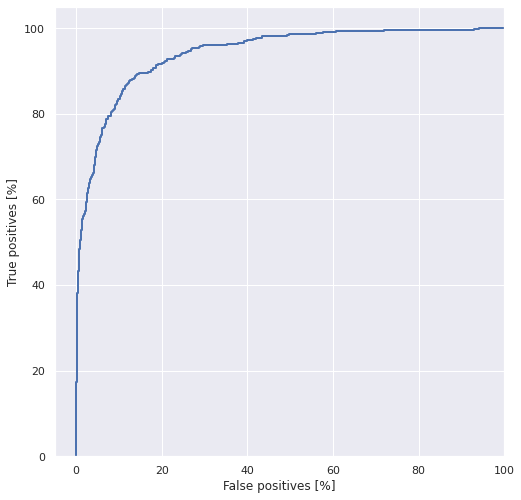

In [34]:
plot_roc('Baseline Classifier', y_test, y_prob)

곡선 아래의 면적값 하나로 ROC curve를 요약할 수 있습니다. 이 면적을 보통 AUC(Area Under the Curve)라고 합니다. 이 ROC curve 아래 면적은 `roc_auc_score` 함수로 계산합니다.

In [35]:
# roc_auc_score 출력하기
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_prob)

0.9421551727017916

scikit-learn의 `classification_report`는 accuracy, precision, recall, f1 score의 점수 모두를 한번에 계산해서 깔끔하게 출력해줍니다.

In [36]:
# classification report 출력하기
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      2526
         1.0       0.75      0.69      0.72       474

    accuracy                           0.91      3000
   macro avg       0.84      0.82      0.83      3000
weighted avg       0.91      0.91      0.91      3000



# **7. Cross Validation**

Machine Learning model training process:

성능이 좋은 모델을 만들기 위해 데이터에 반복적으로 모델을 학습시키는 것은 잘못된 방법입니다. 이렇게 훈련된 모델은 train data에만 매우 잘 작동하는 모델이 되며 이전에 학습하지 않은 데이터를 예측해야 할 경우에는 성능이 떨어지게 됩니다. Overfitting(과적합)을 방지하기 위해서 test set을 따로 분류하여 모델의 성능을 확인하게 됩니다.


<img src=https://scikit-learn.org/stable/_images/grid_search_workflow.png width=400px>



Cross Validation:

모델 훈련 과정 중 test data을 활용하여 최적의 모델 파라미터를 찾는 방법은 적합하지 않습니다. 그 이유는 test data에 가장 좋은 성능을 낼 때까지 모델 파라미터를 조정하게 되기 때문에, test data에 과적합될 가능성이 있기 때문입니다. 따라서 test data에 존재하는 분포가 모델에 노출되어 모델의 일반화 성능을 떨어뜨릴 수 있기 때문입니다. 이와 같은 문제를 해결하기 위해서 파라미터를 조정하기 위한 validation data을 따로 구성합니다. 최적의 모델 파라미터를 validation data을 통해 찾고, 최적의 파라미터로 훈련된 모델의 최종 성능은 test data로 평가하게 됩니다. 비율은 train:test=8:2, 분리된 train data에서 다시 train:val=8:2로 설정되거나 train:val:test=6:2:2 또한 자주 사용됩니다. 데이터 크기에 따라 그 비율 또한 조정되어야 합니다.

데이터 크기가 작아 validation data을 따로 구성할 수 없거나, 특정한 분포의 데이터가 train 혹은 test data에 포함되어 학습에 영향을 주는 것을 방지하기 위해 cross validation을 사용합니다. train data은 k개의 fold으로 나뉘게 되며, k번 반복되어 훈련되지만 각 훈련마다 valiation set을 k 번째 fold으로 사용합니다. k=5가 가장 흔하며, 5-fold CV라고 부릅니다. 성능은 validation data로 사용된 fold들의 평균 정확도로 계산됩니다. 

<img src=https://scikit-learn.org/stable/_images/grid_search_cross_validation.png width=500px>

1. Scikit-learn Cross Validation Score [다큐멘테이션](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [37]:
from sklearn.model_selection import cross_val_score

clf = MLPClassifier(random_state=42, max_iter=1000, learning_rate_init=0.01)
scores = cross_val_score(clf, X_train, y_train, cv=5)
print(scores)

[0.85852941 0.91382353 0.87264706 0.87852941 0.51      ]


In [38]:
scores.mean()

0.8067058823529412

2. Scikit-learn K-Folds cross-validator [다큐멘테이션](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)

In [39]:
# 데이터셋을 train과 validation으로 나누어주는 KFold를 알아봅니다.
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
for train_index, val_index in kf.split(X_train):
  X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[val_index]
  y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]
  print(y_train_cv.value_counts())

0.0    11171
1.0     2429
Name: median_house_value_is_high, dtype: int64
0.0    11194
1.0     2406
Name: median_house_value_is_high, dtype: int64
0.0    11742
1.0     1858
Name: median_house_value_is_high, dtype: int64
0.0    11041
1.0     2559
Name: median_house_value_is_high, dtype: int64
0.0    11744
1.0     1856
Name: median_house_value_is_high, dtype: int64


3. Scikit-learn Stratified K-Folds cross-validator [다큐멘테이션](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)

In [40]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
for train_index, val_index in skf.split(X_train, y_train):
  X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[val_index]
  y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]
  print(y_train_cv.value_counts())

0.0    11378
1.0     2222
Name: median_house_value_is_high, dtype: int64
0.0    11378
1.0     2222
Name: median_house_value_is_high, dtype: int64
0.0    11378
1.0     2222
Name: median_house_value_is_high, dtype: int64
0.0    11379
1.0     2221
Name: median_house_value_is_high, dtype: int64
0.0    11379
1.0     2221
Name: median_house_value_is_high, dtype: int64


#  **과제**

### Credit Card Fraud dataset

Credit Card Fraud dataset는 2013년 9월 유럽 사용자의 이틀 동안의 신용카드 결제내역입니다.
284,807개의 지불내역 중 492개의 이상 거래가 있습니다. 데이터의 불균형이 매우 심하며, positive class(이상 거래)은 모든 지불내역의 0.172% 입니다.

데이터에는 PCA(Principal component analysis) 변환의 결과인 숫자 입력 변수만 포함되며, 기밀성 문제로 인해 데이터의 원래 기능과 더 많은 배경 정보가 제공되지 않습니다. 특징 `V1`, `V2` … `V28`은 PCA를 통해 얻은 주요 feature이며, PCA를 통해 변환되지 않은 feature들은 `time`과 `amount`입니다. `time` feature에는 각 지불내역과 데이터 집합의 첫 번째 지불내역 사이에 경과된 초입니다. `amount` 기능은 지불내역 금액입니다. `Class` feature은 label이며 이상 거래 발생 시 `1`이며 그렇지 않으면 `0`입니다.

In [41]:
import numpy as np

raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')

In [42]:
# 데이터의 column을 프린트해봅니다.
raw_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [43]:
raw_df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V26', 'V27', 'V28', 'Amount', 'Class']].describe()

,Time,V1,V2,V3,V4,V5,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [44]:
# Class의 분포를 확인해봅니다.
raw_df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [45]:
cleaned_df = raw_df.copy()

# time column을 삭제합니다.
cleaned_df.pop("Time")

# amount feature은 범위가 매우 넓습니다. log-space로 변환합니다.
eps = 0.001
cleaned_df['Log_Amount'] = np.log(cleaned_df.pop('Amount') + eps)

### **과제 내용:**

1. 데이터를 train 및 test 데이터로 나눕니다. (비율은 8:2)

  1-1. train/test데이터를 각각 X, y로 나누고(`.pop()`), numpy array로 변환합니다.(`np.array()`)

  1-2. 아래 코드를 사용하여 데이터를 표준화합니다.
    ```
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    X_train = np.clip(X_train, -5, 5)
    X_test = np.clip(X_test, -5, 5)
    ```

  1-3. Scikit-learn의 [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) 다큐멘테이션을 읽고 위 코드가 무엇을 하는지 서술합니다.
  

2. 현재까지 실습에서 다룬 classifier (`CategoricalNB`, `DecisionTreeClassifier`, `LogisticRegression`, `MLPClassifier`) 중 하나를 선택하여 모델을 생성합니다.

3. 선택한 모델의 파라미터 중, 최소 두 개의 파라미터를 최소 두 개의 각기 다른 값으로 설정하여 아래 두 가지의 k-fold CV 방법으로 각각 훈련시켜봅니다.

  3-1. Scikit-learn의 `Kfold`을 사용하여 해당 모델을 훈련시키고 평균 성능을 출력합니다.

  3-2. Scikit-learn의 `StratifiedKFold`을 사용하여 해당 모델을 훈련시키고 평균 성능을 출력합니다.

4. 2번 및 3번 과정에서 얻어진 최적의 파라미터로 최종 모델을 train 데이터에 학습시키고 test 데이터에 대하여 정확도를 출력합니다.

5. confusion matrix을 출력하고, 이를 시각화합니다

6. Precision-Recall curve을 시각화합니다

7. ROC curve을 시각화합니다.

8. AUC을 출력합니다.

9. classification report을 출력합니다.

10. 위의 결과를 바탕으로 모델이 불균형한 데이터의 관점으로 성능을 평가합니다. 정확도, precision, recall, f1 score, auc에 대한 분석과 더불어 precision-recall curve, roc curve에 대하여도 서술하여야 합니다.

In [46]:
#1-1
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(cleaned_df, test_size=0.2, random_state=42)
y_train = np.array(train_df.pop('Class'))
y_test = np.array(test_df.pop('Class'))
X_train = np.array(train_df)
X_test = np.array(test_df)

In [47]:
#1-2
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = np.clip(X_train, -5, 5)
X_test = np.clip(X_test, -5, 5)

###1-3
StandardScaler를 통해 데이터를 표준화한다. 코드는 train에 대해서만 fit_transform을 적용하고 test에 대해서는 fit을 적용하지 않는데, 이는 test에서는 train data의 평균값으로 적용해야하기 때문이다.

In [68]:
#2
model_1 = MLPClassifier(random_state=42)

###3-1

In [48]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

hidden_nodes = [25, 50]
lrs = [0.01, 0.015]

best_acc = -1
accs = []

kf = KFold(n_splits=2)

for train_index, test_index in kf.split(X_train):
  X_train_kf, X_test_kf = X_train[train_index], X_train[test_index]
  y_train_kf, y_test_kf = y_train[train_index], y_train[test_index]

  for h in hidden_nodes:
    for lr in lrs:
      model_1 = MLPClassifier(hidden_layer_sizes=(h, ), learning_rate_init=lr, random_state=42)
      model_1.fit(X_train_kf, y_train_kf)
      cur_acc = model_1.score(X_test_kf, y_test_kf)
      print(f'Accuracy of Current Model : {cur_acc}')
      accs.append(cur_acc)
      if cur_acc > best_acc:
        best_acc = cur_acc
        best_model_params = [h, lr]

print(f'Average Accuracy of Models : {np.mean(accs)}')
print(f'Accuracy of Best Model : {best_acc}')
print(best_model_params)

Accuracy of Current Model : 0.9994206613238766
Accuracy of Current Model : 0.9992363262905647
Accuracy of Current Model : 0.9992187705731064
Accuracy of Current Model : 0.999315327019127
Accuracy of Current Model : 0.9993153210091115
Accuracy of Current Model : 0.9993240989448922
Accuracy of Current Model : 0.9993328768806727
Accuracy of Current Model : 0.9993943224311371
Average Accuracy of Models : 0.999319713059061
Accuracy of Best Model : 0.9994206613238766
[25, 0.01]


###3-2

In [50]:
from sklearn.model_selection import StratifiedKFold

hidden_nodes = [25, 50]
lrs = [0.01, 0.015]

accs = []

kf = StratifiedKFold(n_splits=2, random_state=None, shuffle=False)

for train_index, test_index in kf.split(X_train, y_train):
  X_train_kf, X_test_kf = X_train[train_index], X_train[test_index]
  y_train_kf, y_test_kf = y_train[train_index], y_train[test_index]

  for h in hidden_nodes:
    for lr in lrs:
      model_1 = MLPClassifier(hidden_layer_sizes=(h, ), learning_rate_init=lr, random_state=42)
      model_1.fit(X_train_kf, y_train_kf)
      cur_acc = model_1.score(X_test_kf, y_test_kf)
      print(f'Accuracy of Current Model : {cur_acc}')
      accs.append(cur_acc)
      if cur_acc > best_acc:
        best_acc = cur_acc
        best_model_params = [h, lr]

print(f'Average Accuracy of Models : {np.mean(accs)}')
print(f'Accuracy of Best Model : {best_acc}')
print(best_model_params)

Accuracy of Current Model : 0.9992889934429395
Accuracy of Current Model : 0.9992714377254812
Accuracy of Current Model : 0.999315327019127
Accuracy of Current Model : 0.9993241048778561
Accuracy of Current Model : 0.9992714313302083
Accuracy of Current Model : 0.9990783167430347
Accuracy of Current Model : 0.9993240989448922
Accuracy of Current Model : 0.9993416548164533
Average Accuracy of Models : 0.999276920612499
Accuracy of Best Model : 0.9994206613238766
[25, 0.01]


In [53]:
#4
h, lr = best_model_params
best_model = MLPClassifier(hidden_layer_sizes=(h, ), learning_rate_init=lr, random_state=42)
best_model.fit(X_train, y_train)
best_model.score(X_test, y_test)

0.9993153330290369

In [54]:
#5
from sklearn.metrics import confusion_matrix

y_predict = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]
confusion_matrix(y_test, y_predict)

array([[56852,    12],
       [   27,    71]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


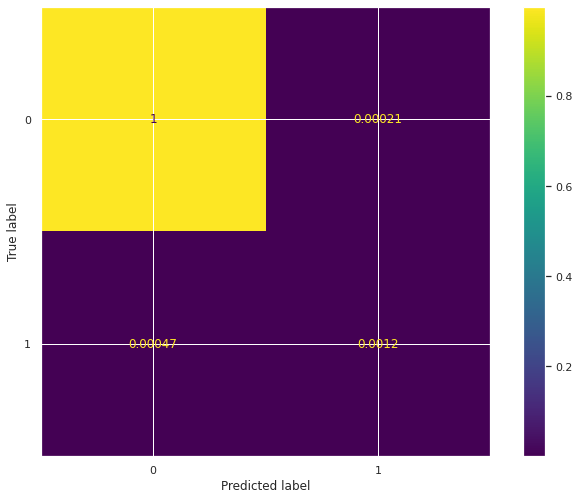

In [55]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(best_model, X_test, y_test, normalize='all')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


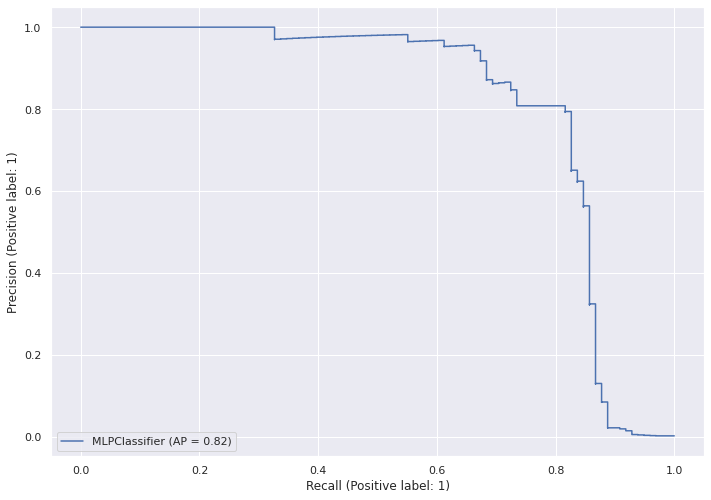

In [57]:
#6
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(best_model, X_test, y_test)

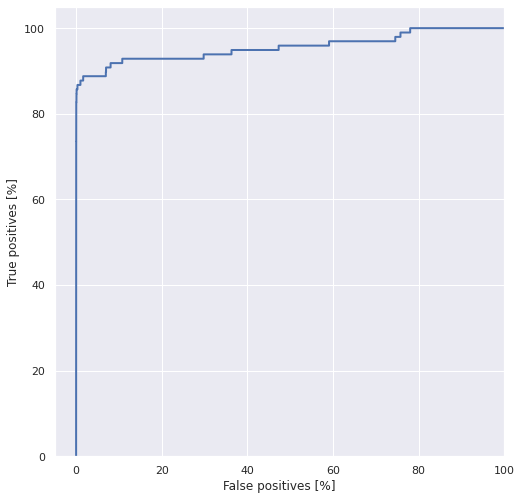

In [59]:
#7
from sklearn.metrics import roc_curve

plot_roc('ROC CURVE', y_test, y_proba)

In [60]:
#8
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_proba)

0.9553768820415054

In [66]:
#9
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.72      0.78        98

    accuracy                           1.00     56962
   macro avg       0.93      0.86      0.89     56962
weighted avg       1.00      1.00      1.00     56962



위의 결과를 바탕으로 모델이 불균형한 데이터의 관점으로 성능을 평가합니다. 정확도, precision, recall, f1 score, auc에 대한 분석과 더불어 precision-recall curve, roc curve에 대하여도 서술하여야 합니다.

In [67]:
#10
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f'Accuracy : {accuracy_score(y_test, y_predict)}')
print(f'Precision : {precision_score(y_test, y_predict)}')
print(f'Recall : {recall_score(y_test, y_predict)}')
print(f'f1 score : {f1_score(y_test, y_predict)}')
print(f'AUC : {roc_auc_score(y_test, y_proba)}')

Accuracy : 0.9993153330290369
Precision : 0.8554216867469879
Recall : 0.7244897959183674
f1 score : 0.7845303867403315
AUC : 0.9553768820415054


score는 정확도를 의미하는데, F1 스코어는 recall과 precision의 조화평균이므로 biased data에서 의미있는 지표임을 고려할 때 0.7845는 높은 수치이고 이는 classification_report의 class 0와 class 1을 비교했을 때 0으로 편향되어있음을 통해 이해할 수 있다.
또 classification_report에서 class 0에 대해 스코어가 높은 것은 분류가 올바르게 이뤄지고 있음을 뜻한다. 이에 반해 class 1에서는 precision의 수치가 0.86이고 recall이 0.72인 것으로 보아 class 1 중 72%만 올바르게 판별하고 class 1의 분류 중 실제 class 1의 비율은 86%이다. 이러한 결과를 바탕으로 분류기가 상대적으로 class 0의 분류에 특화되어 작동하고 있음을 알 수 있다.

여러 지표들 가운데 precision-recall curve와 roc curve는 기준(threshold)에 따른 지표의 값을 보여준다. Precision-recall curve는 우상향할수록 좋고 roc curve는 좌측 상단에 가까울수록 성능이 좋다는 점을 고려했을 때, best_model은 이러한 property를 잘 만족하고 있으며, 1에 가까울수록 성능이이 좋은 auc 역시 0.9553이므로 좋은 성능의 모델이라 할 수 있다.

# 실습 5차시 설문 조사

실습 과제를 모두 마친 후 설문에 참여해주세요. \
링크: https://forms.gle/4vzb2tuDP7sfnJfcA

※설문에 참여해주신 수강생분들 중 다섯 명을 추첨하여 작은 선물을 드릴 예정이오니, 수강생분들의 많은 참여 바랍니다.※